# Encapsulation: Access modified
Refers to bind and hide data to the classess

* __PUBLIC__: Accessed by __any class__
* **PROTECTED**: Accessed __with in class and subclass__ ( _ )
* **PRIVATE**: Acessed only __with in class__ ( _ _ )

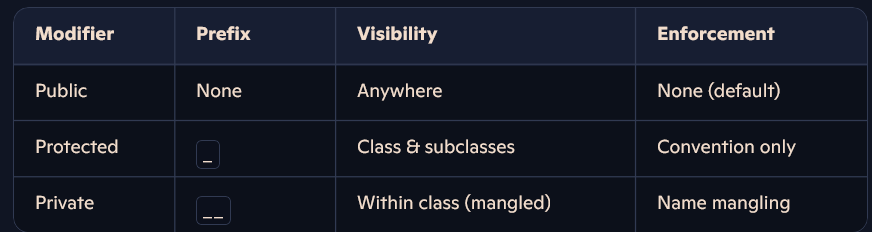

Name mangling: **obj._Class__data**

## Public

In [2]:
class Customer:
    def __init__(self, name, email):
        self.name = name      # public attribute
        self.email = email    # public attribute

john = Customer("John Doe", "john@example.com")
print(john.name)           # Output: John Doe
john.email = "new@example.com"
print(john.email)          # Output: new@example.com

#In this example, both name and email are freely accessible and mutable from outside the class.

John Doe
new@example.com


## Protected

In [6]:
class Employee:
    def __init__(self, name, salary):
        self.name = name          # public
        self._salary = salary     # protected

class Manager(Employee):
    def get_bonus(self):
        return self._salary * 0.1

mgr = Manager("Alice", 120000)
print(mgr._salary)            # Accessible, but discouraged
print(mgr.get_bonus())        # 12000.0
mgr._salary = 5000
print(mgr._salary)

#Here, _salary is intended for internal use by Employee and its subclasses, but Python does not prevent external access.

120000
12000.0
5000


# Private

In [22]:
class Secret:
    def __init__(self, data):
        self.__data = data       # private

    def reveal(self):
        return self.__data

class Child(Secret):
    pass

s = Secret("top-secret")
print(s.reveal())              # Output: top-secret
# Direct access will fail:
# print(s.__data)             # AttributeError
c = Child("secret data")
# print(c.__data)
# But you can still access it via name mangling:
print(s._Secret__data)         # Output: top-secret
print(c._Secret__data)

#Attempting to access __data directly raises an AttributeError, though the mangled name _Secret__data remains reachable if needed.

top-secret
top-secret
secret data


# Inheritance

In [129]:
class Parent:
    def __init__(self, name):
        self.name = name
class childA(Parent):
    def __init__(self, branch):
        # super().__init__('Default name')
        Parent.__init__(self,'D name') #to-do: Direct call won't respect MRO dynamically
        self.branch = branch

c_obj = childA('ece')
print(c_obj.name)
print(c_obj.branch)

D name
ece


# Method overloading and overriding

# Operator overloading

In [98]:
class Other:
    pass
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __add__(self, other):
        if not isinstance(other, Point):
            return NotImplemented
        # return (self.x + other.x, self.y + other.y)
        return Point(self.x + other.x, self.y + other.y)
p1=Point(1,2)
p2=Point(3,4)
p3=Other()
# print(p1+p2)
# print(p1+p3)
result = p1+p2
print(isinstance(result, Point))
print(result.x, result.y)

True
4 6


In [102]:
# Reflected and in place operation:  let your class handle cases when it appears on the right side of an operator.
# __radd__, __rsub__, __rmul__
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __radd__(self, other):
        
        return (self.x + other, self.y + other)
        # return Point(self.x + other.x, self.y + other.y)
p1=Point(2,3)
print(10+p1)
# print(p1+10) #wont work

(12, 13)


In [104]:
# In-Place Methods (__iadd__, etc.) define behavior for operators like +=
# iadd, isub, imul
class Counter:
    def __init__(self, count=0):
        self.count = count

    def __iadd__(self, other):
        self.count += other
        return self

    def __repr__(self):
        return f"Counter({self.count})"

c = Counter(2)
c += 3
print(c)  # Output: Counter(5)

Counter(5)


In [106]:
# Comparision overloading
class Version:
    def __init__(self, major, minor):
        self.major = major
        self.minor = minor

    def __eq__(self, other):
        return (self.major, self.minor) == (other.major, other.minor)

    def __lt__(self, other):
        return (self.major, self.minor) < (other.major, other.minor)

    def __repr__(self):
        return f"{self.major}.{self.minor}"

v1 = Version(1, 2)
v2 = Version(1, 3)
print(v1 < v2)   # True
print(v1 == v2)  # False

True
False


In [108]:
# Container protocol
class SimpleList:
    def __init__(self, data):
        self._data = list(data)

    def __getitem__(self, idx):
        return self._data[idx]

    def __setitem__(self, idx, value):
        self._data[idx] = value

    def __len__(self):
        return len(self._data)

lst = SimpleList([10, 20, 30])
print(lst[1])    # 20
lst[1] = 99
print(len(lst))  # 3
print(lst[1])

20
3
99


## overloading <code>_ \_call_ _</code>
Defining the <code>__call__</code> method in your class makes its instances callable like functions. Whenever you write <code>instance(args…)</code>, Python invokes <code>instance.__call__(args…)</code> under the hood.


In [116]:
class Greeter:
    def __init__(self, greeting):
        self.greeting = greeting
        self.count = 0

    def __call__(self, name):
        self.count += 1
        return f"{self.greeting}, {name}!"
    def check_count(self):
        return self.count

# Greeter('hello')('World')
o = Greeter('Hello')
print(o('world'))
print(o('world1'))
print(o.count)



Hello, world!
Hello, world1!
2


# @property | Getter & Setter 
* Allows to use methods as properties.
* Benefit: Add additional logic when read, write or delete attribute
  

In [127]:
class Rectangle:
    def __init__(self, width, height):
        self._width = width
        self._height = height
    def get_width(self):
        return f'width is {self._width}'
    def set_width(self, new_width):
        self._width = new_width
    @property
    def get_width_attribute(self):
        return f'width is {self._width}'
    @get_width_attribute.setter
    def set_width_attribute(self, new_width):
        self._width = new_width
        print( f'new width set to {self._width}')

r = Rectangle(3,2)
print(r._width, r._height)
print(r.get_width())
print(r.get_width_attribute)
r.set_width(1)
print(r.get_width_attribute)
r.set_width_attribute = 2

3 2
width is 3
width is 3
width is 1
new width set to 2


# Decorators

In [36]:
def validate(func):
    def wrapper(x, y):
        if y == 0:
            return 'Divison by 0'
        else:
            return func(x,y)
    return wrapper

@validate
def div(a,b):
    return a/b
print(div(2,3))
print(div(2,0))

0.6666666666666666
Divison by 0


## Decorator with argument

In [40]:
# decorator which validate the divisor and add a constant
def custom_validate(item):
    def validate(func):
        def wrapper(x, y):
            if y == 0:
                return 'Divison by 0'
            else:
                return func(x,y) + item
        return wrapper
    return validate

@custom_validate(1)
def div(a,b):
    return a/b

print(div(2,0))

Divison by 0


## Stacking Multiple Decorators

In [41]:
def bold(func):
    def wrapper(*args, **kwargs):
        return f"<b>{func(*args, **kwargs)}</b>"
    return wrapper

def italic(func):
    def wrapper(*args, **kwargs):
        return f"<i>{func(*args, **kwargs)}</i>"
    return wrapper

@bold
@italic
def text(msg):
    return msg

print(text("Hello"))
# Output: <b><i>Hello</i></b>

<b><i>Hello</i></b>


## Class based decorators 
A decorator can be a class that implements _ \_call_ \_.  
The class’s constructor receives the function, and _ \_call__ wraps the function execution.


In [69]:
class TestDivision:
    def __init__(self, func):
        self.func = func
    def __call__(self, a, b):
        if b == 0:
            return "Do not divide by zero"
        else:
            return self.func(a,b)

@TestDivision
def div(a,b):
    return a/b

print(div(2,0))
print(div(5,2))

Do not divide by zero
2.5


## Common Built-in Decorators
- @staticmethod creates a method that does not receive self or cls.  
  * Improves redability with no performance improvement
- @classmethod receives the class itself (cls) instead of an instance.
  * Most common use case: Define alternate constructor
  * factory methods
- @property makes a method accessible like a read-only attribute.


In [72]:
class Book:
    total_books = 0

    def __init__(self, title):
        self.title = title
        Book.total_books += 1

    @classmethod
    def get_total_books(cls):
        return cls.total_books

    @classmethod
    def from_string(cls, book_str):
        title = book_str.strip()
        return cls(title)   # works as alternate construntor

# Calling the class methods without creating an instance
print(Book.get_total_books())        # 0
new_book = Book.from_string("Dune")
print(Book.get_total_books())        # 1

0
1


In [76]:
class Car:
    wheels = 4
    def __init__(self, brand):
        self.brand = brand

vw = Car('VW')
print(vw.wheels)

print(vw.brand)
vw.brand = 'skoda'
print(vw.brand)

vw.wheels =5
print(vw.wheels)

tata = Car('TATA')
print(tata.wheels)

4
VW
skoda
5
4


In [ ]:
class User:
    def __init__(self, username, email):
        self.username = username
        self.email = email

    @classmethod
    def from_dict(cls, data):
        """
        Alternate constructor that reads from a dict.
        """
        username = data.get("username")
        email = data.get("email")
        return cls(username, email)

    @classmethod
    def from_csv(cls, row):
        """
        Alternate constructor that reads from a CSV row.
        """
        username, email = row.split(",")
        return cls(username.strip(), email.strip())


# Usage

user1 = User("alice", "alice@example.com")
user2 = User.from_dict({"username": "bob", "email": "bob@example.com"})
user3 = User.from_csv("charlie,charlie@example.com")

## Iterators & Generators

In [63]:
class PowerOfTwo:
    def __init__(self, max_power):
        self.max_power = max_power
        self.current = 0

    def __iter__(self): 
        return self

    def __next__(self):
        if self.current > self.max_power:
            raise StopIteration
        result = 2 ** self.current
        self.current += 1
        return result

itr_obj = PowerOfTwo(2)


In [65]:
next(itr_obj)

2

## Generators:  
For simpler use cases

In [78]:
def infinite_sequence(n):
    num = 0
    while num<n:
        yield num
        num += 1
print([i for i in infinite_sequence(5)])
gen = infinite_sequence(2)
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))

[0, 1, 2, 3, 4]
0
1


StopIteration: 

## Generator expression

In [79]:
squares = (x * x for x in range(5))
for sq in squares:
    print(sq)


0
1
4
9
16


# Deepcopy vs shallow copy
* Assignment(=) only creates reference 
* shallow copy: copy.copy(): constructs a new top-level object but inserts references to the same nested elements found in the original
* A deep copy builds a completely independent clone by recursively copying all nested objects
* Customize copy behavior in your own classes with _ \_copy_ _ and _ \_deepcopy_ _

In [83]:
import copy

original = [[1, 2], [3, 4],'sree']
shallow = copy.copy(original)
shallow[0][0] = 99
shallow [2] = 'Sree'
print(original)  # [[99, 2], [3, 4]]
print(shallow)   # [[99, 2], [3, 4]]
print(id(original))
print(id(shallow))

[[99, 2], [3, 4], 'sree']
[[99, 2], [3, 4], 'Sree']
1776262313408
1776262222912


In [84]:
import copy

original = [[1, 2], [3, 4]]
deep = copy.deepcopy(original)
deep[0][0] = 99

print(original)  # [[1, 2], [3, 4]]
print(deep)      # [[99, 2], [3, 4]]

[[1, 2], [3, 4]]
[[99, 2], [3, 4]]


# Sorting Algos